## Importing Necessary Libraries

In [1]:
import os
import re
import math
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from math import sqrt
from sklearn.ensemble import *
from scipy.stats import mode
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('F://PGD-Data Science//Analytics_Vidhya_Hackathons//Big Mart Sales Prediction Hackathon//train.csv')

In [3]:
test = pd.read_csv('F://PGD-Data Science//Analytics_Vidhya_Hackathons//Big Mart Sales Prediction Hackathon//test.csv')

In [4]:
train_data = train.copy()

In [5]:
test_data = test.copy()

In [6]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
train_data.shape

(8523, 12)

In [9]:
test_data.shape

(5681, 11)

In [10]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [11]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [14]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [16]:
train_data['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

In [17]:
test_data['Item_Type'].value_counts(normalize=True)

Snack Foods              0.138884
Fruits and Vegetables    0.137476
Household                0.112304
Frozen Foods             0.100334
Dairy                    0.079916
Baking Goods             0.077099
Canned                   0.076571
Health and Hygiene       0.059497
Meat                     0.054744
Soft Drinks              0.049463
Breads                   0.029044
Hard Drinks              0.026052
Starchy Foods            0.021299
Others                   0.019539
Breakfast                0.013378
Seafood                  0.004401
Name: Item_Type, dtype: float64

In [18]:
train_data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
test_data['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [20]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
test_data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [22]:
train_data['Outlet_Location_Type'].value_counts(normalize=True)

Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: Outlet_Location_Type, dtype: float64

In [23]:
test_data['Outlet_Location_Type'].value_counts(normalize=True)

Tier 3    0.393065
Tier 2    0.326703
Tier 1    0.280232
Name: Outlet_Location_Type, dtype: float64

In [24]:
train_data['Outlet_Type'].value_counts(normalize=True)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [25]:
test_data['Outlet_Type'].value_counts(normalize=True)

Supermarket Type1    0.654286
Grocery Store        0.127090
Supermarket Type3    0.109840
Supermarket Type2    0.108784
Name: Outlet_Type, dtype: float64

In [26]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

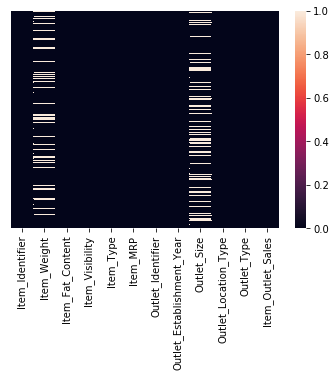

In [28]:
sns.heatmap(train_data.isnull(), yticklabels = False)

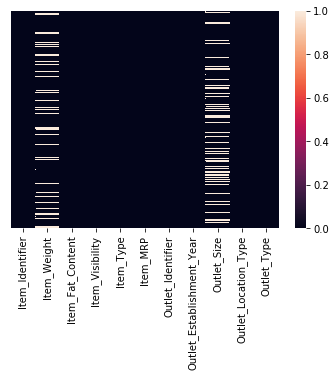

In [29]:
sns.heatmap(test_data.isnull(), yticklabels = False)

## Variable Analysis

In [30]:
# Target Variable = Item_Outlet_Sales
# Independent Categorical Variables = Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Type
# Independent Numerical Variables = Item_Weight, Item_Visibility, Item_MRP
# Independent Ordinal Variables - Outlet_Establishment_Year
# Miscellaneous Variables - Item_Identifier, Outlet_Identifier

## Feature Engineering - Variable Transformation, Variable Dropping, Variable Renaming & Variable Creation, Missing Value Treatment, Outlier Treatment

### Univariate Analysis

### Categorizing Item_Fat_Content Variables into Low and Reguar Fat

In [31]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat',
                                                                         'Regular':'Regular Fat', 'reg':'Regular Fat'})

In [32]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 
                                                                       'Regular':'Regular Fat', 'reg':'Regular Fat'})

### Item_Outlet_Sales

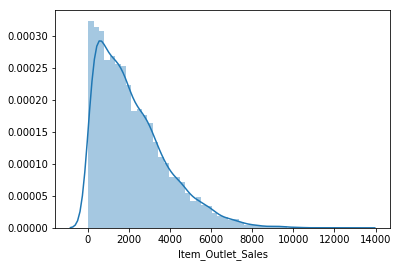

In [33]:
sns.distplot(train_data['Item_Outlet_Sales'])

### Dependent Variable transformation by taking cube root

In [34]:
train_data['Item_Outlet_Sales_New'] = train_data['Item_Outlet_Sales'] ** (1/3)

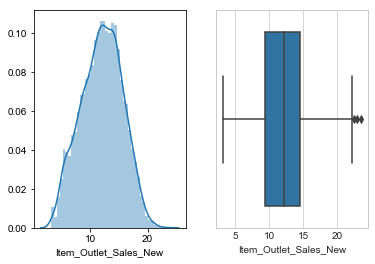

In [35]:
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.distplot(train_data['Item_Outlet_Sales_New'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Item_Outlet_Sales_New'])
plt.show()

### Independent Categorical Variables

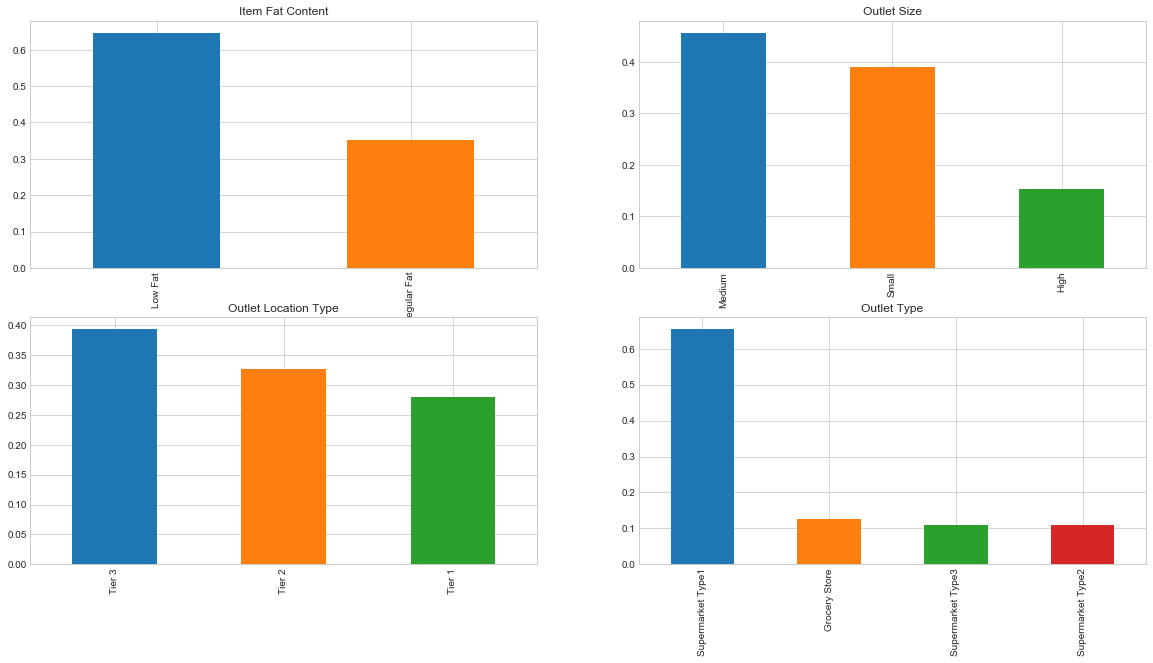

In [36]:
plt.subplot(2,2,1)
train_data['Item_Fat_Content'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Item Fat Content')
plt.subplot(2,2,2)
train_data['Outlet_Size'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Outlet Size')
plt.subplot(2,2,3)
train_data['Outlet_Location_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Outlet Location Type')
plt.subplot(2,2,4)
train_data['Outlet_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Outlet Type')

## Independent Numerical Variables

### Cube root of Item Visibility 

In [37]:
train_data['Item_Visibility'] = train_data['Item_Visibility'] ** (1/3)

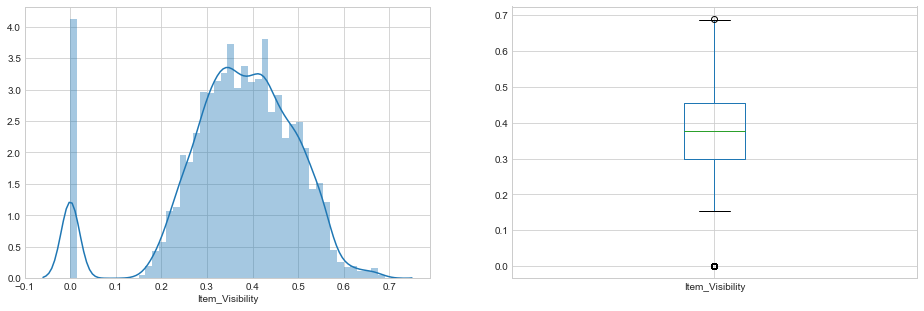

In [38]:
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.distplot(train_data['Item_Visibility'])
plt.subplot(1,2,2)
train_data['Item_Visibility'].plot.box(figsize=(16,5))
plt.show()

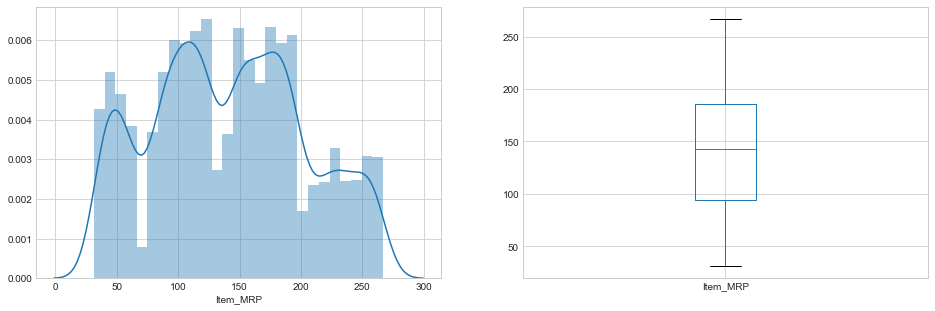

In [39]:
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.distplot(train_data['Item_MRP'])
plt.subplot(1,2,2)
train_data['Item_MRP'].plot.box(figsize=(16,5))
plt.show()

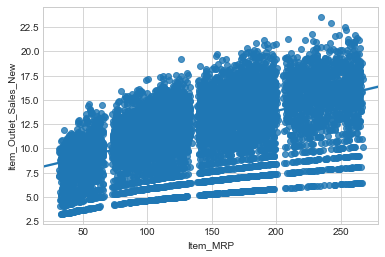

In [40]:
sns.regplot(x=train_data["Item_MRP"], y=train_data["Item_Outlet_Sales_New"])

### Independent Ordinal Variables

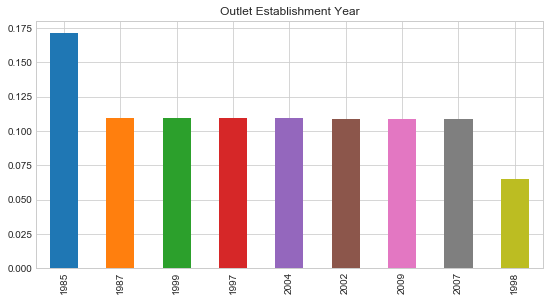

In [41]:
plt.subplot(2,2,1)
train_data['Outlet_Establishment_Year'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Outlet Establishment Year')

### Binning Item_Type into 3 categories

In [42]:
train_data['Item_Type_New'] = train_data['Item_Type']
test_data['Item_Type_New'] = test_data['Item_Type']

In [43]:
train_data['Item_Type_New'][train_data['Item_Identifier'].str[:2]=='FD']='Food'
train_data['Item_Type_New'][train_data['Item_Identifier'].str[:2]=='NC']='Non-Consumption'
train_data['Item_Type_New'][train_data['Item_Identifier'].str[:2]=='DR']='Drinks'

In [44]:
test_data['Item_Type_New'][test_data['Item_Identifier'].str[:2]=='FD']='Food'
test_data['Item_Type_New'][test_data['Item_Identifier'].str[:2]=='NC']='Non-Consumption'
test_data['Item_Type_New'][test_data['Item_Identifier'].str[:2]=='DR']='Drinks'

## Variable(s) To Be Dropped - Item_Identifier, Outlet_Identifier, Item_Sales

In [45]:
var_drop1 = ['Item_Identifier']
train_data = train_data.drop(var_drop1, axis=1)
test_data = test_data.drop(var_drop1, axis=1)

In [46]:
var_drop2 = ['Outlet_Identifier']
train_data = train_data.drop(var_drop2, axis=1)
test_data = test_data.drop(var_drop2, axis=1)

In [47]:
var_drop3 = ['Item_Outlet_Sales']
train_data = train_data.drop(var_drop3, axis=1)

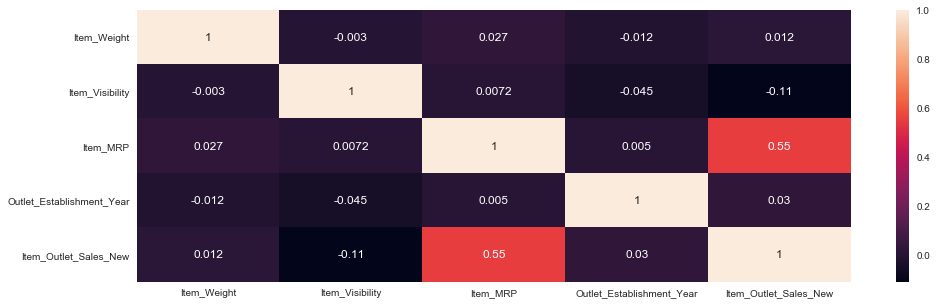

In [48]:
sns.set(rc={'figure.figsize':(16,5)})
sns.heatmap(train_data.corr(),annot=True)

### Calculating Tenure Of Outlet_Establishment_Year by substracting from 2020

In [49]:
train_data['Outlet_Establishment_Year'] = 2020 - train_data['Outlet_Establishment_Year']

In [50]:
test_data['Outlet_Establishment_Year'] = 2020 - test_data['Outlet_Establishment_Year']

### Displaying Corelation between dependent and independent variables via heatmap 

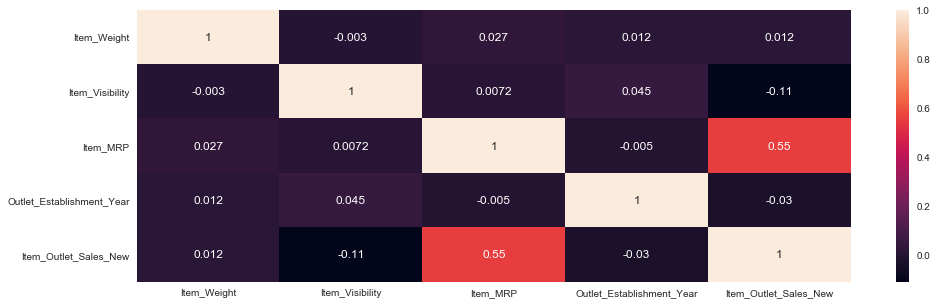

In [51]:
sns.set(rc={'figure.figsize':(16,5)})
sns.heatmap(train_data.corr(),annot=True)

### Replacing null values of Item_Weight category wise basis mean of Item_Type of each category

In [52]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [53]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data.groupby('Item_Type')['Item_Weight'].transform('mean'))

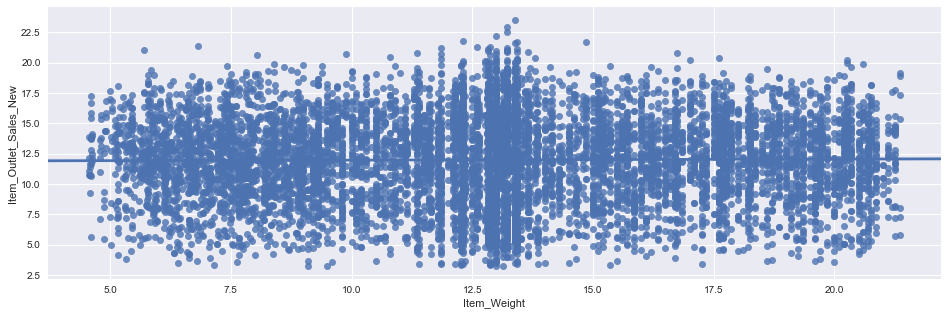

In [54]:
sns.regplot(x=train_data["Item_Weight"], y=train_data["Item_Outlet_Sales_New"])

In [55]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales_New,Item_Type_New
0,9.30,Low Fat,0.252232,Dairy,249.8092,21,Medium,Tier 1,Supermarket Type1,15.515611,Food
1,5.92,Regular Fat,0.268136,Soft Drinks,48.2692,11,Medium,Tier 3,Supermarket Type2,7.625576,Drinks
2,17.50,Low Fat,0.255913,Meat,141.6180,21,Medium,Tier 1,Supermarket Type1,12.800240,Food
3,19.20,Regular Fat,0.000000,Fruits and Vegetables,182.0950,22,NaN,Tier 3,Grocery Store,9.013888,Food
4,8.93,Low Fat,0.000000,Household,53.8614,33,High,Tier 3,Supermarket Type1,9.982319,Non-Consumption


In [56]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New
0,20.75000,Low Fat,0.007565,Snack Foods,107.8622,21,Medium,Tier 1,Supermarket Type1,Food
1,8.30000,Regular Fat,0.038428,Dairy,87.3198,13,NaN,Tier 2,Supermarket Type1,Food
2,14.60000,Low Fat,0.099575,Others,241.7538,22,NaN,Tier 3,Grocery Store,Non-Consumption
3,7.31500,Low Fat,0.015388,Snack Foods,155.0340,13,NaN,Tier 2,Supermarket Type1,Food
4,12.95504,Regular Fat,0.118599,Dairy,234.2300,35,Medium,Tier 3,Supermarket Type3,Food


### Replacing null values of Outlet_Size category wise basis Mode of Outlet_Type 

In [57]:
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data.groupby('Outlet_Type')['Outlet_Size'].count().index.max())

In [58]:
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data.groupby('Outlet_Type')['Outlet_Size'].count().index.max())

### Replacing zeros of Item_Visibility by Mode of Item_Visibility

In [59]:
train_data['Item_Visibility']=train_data['Item_Visibility'].mask(train_data['Item_Visibility']==0).fillna(train_data['Item_Visibility'].mode()[0])

In [60]:
test_data['Item_Visibility']=test_data['Item_Visibility'].mask(test_data['Item_Visibility']==0).fillna(test_data['Item_Visibility'].mode()[0])

In [61]:
train_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales_New        0
Item_Type_New                0
dtype: int64

In [62]:
test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Type_New                0
dtype: int64

In [63]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales_New,Item_Type_New
0,9.30,Low Fat,0.252232,Dairy,249.8092,21,Medium,Tier 1,Supermarket Type1,15.515611,Food
1,5.92,Regular Fat,0.268136,Soft Drinks,48.2692,11,Medium,Tier 3,Supermarket Type2,7.625576,Drinks
2,17.50,Low Fat,0.255913,Meat,141.6180,21,Medium,Tier 1,Supermarket Type1,12.800240,Food
3,19.20,Regular Fat,0.000000,Fruits and Vegetables,182.0950,22,Supermarket Type3,Tier 3,Grocery Store,9.013888,Food
4,8.93,Low Fat,0.000000,Household,53.8614,33,High,Tier 3,Supermarket Type1,9.982319,Non-Consumption


In [64]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New
0,20.75000,Low Fat,0.007565,Snack Foods,107.8622,21,Medium,Tier 1,Supermarket Type1,Food
1,8.30000,Regular Fat,0.038428,Dairy,87.3198,13,Supermarket Type3,Tier 2,Supermarket Type1,Food
2,14.60000,Low Fat,0.099575,Others,241.7538,22,Supermarket Type3,Tier 3,Grocery Store,Non-Consumption
3,7.31500,Low Fat,0.015388,Snack Foods,155.0340,13,Supermarket Type3,Tier 2,Supermarket Type1,Food
4,12.95504,Regular Fat,0.118599,Dairy,234.2300,35,Medium,Tier 3,Supermarket Type3,Food


### Creating Dummy Variables

In [65]:
train_data_cat=train_data[train_data.select_dtypes(include=np.object).columns.tolist()]

In [66]:
train_data_num=train_data[train_data.select_dtypes(include=np.number).columns.tolist()]

In [67]:
test_data_cat=test_data[test_data.select_dtypes(include=np.object).columns.tolist()]

In [68]:
test_data_num=test_data[test_data.select_dtypes(include=np.number).columns.tolist()]

In [69]:
train_data_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,Food
1,Regular Fat,Soft Drinks,Medium,Tier 3,Supermarket Type2,Drinks
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,Food
3,Regular Fat,Fruits and Vegetables,Supermarket Type3,Tier 3,Grocery Store,Food
4,Low Fat,Household,High,Tier 3,Supermarket Type1,Non-Consumption


In [70]:
train_data_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales_New
0,9.30,0.252232,249.8092,21,15.515611
1,5.92,0.268136,48.2692,11,7.625576
2,17.50,0.255913,141.6180,21,12.800240
3,19.20,0.000000,182.0950,22,9.013888
4,8.93,0.000000,53.8614,33,9.982319


In [71]:
test_data_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1,Food
1,Regular Fat,Dairy,Supermarket Type3,Tier 2,Supermarket Type1,Food
2,Low Fat,Others,Supermarket Type3,Tier 3,Grocery Store,Non-Consumption
3,Low Fat,Snack Foods,Supermarket Type3,Tier 2,Supermarket Type1,Food
4,Regular Fat,Dairy,Medium,Tier 3,Supermarket Type3,Food


In [72]:
test_data_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.75000,0.007565,107.8622,21
1,8.30000,0.038428,87.3198,13
2,14.60000,0.099575,241.7538,22
3,7.31500,0.015388,155.0340,13
4,12.95504,0.118599,234.2300,35


In [73]:
train_data_cat_dum = pd.get_dummies(train_data_cat)

In [74]:
test_data_cat_dum = pd.get_dummies(test_data_cat)

In [75]:
train_data_cat_dum.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Drinks,Item_Type_New_Food,Item_Type_New_Non-Consumption
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [76]:
test_data_cat_dum.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Drinks,Item_Type_New_Food,Item_Type_New_Non-Consumption
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


### Concatenating and Combining Categorical Dummy Variables and Numerical Data

In [77]:
train_comb = pd.concat([train_data_cat_dum, train_data_num], axis=1)

In [78]:
test_comb = pd.concat([test_data_cat_dum, test_data_num], axis=1)

In [79]:
train_comb.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Drinks,Item_Type_New_Food,Item_Type_New_Non-Consumption,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales_New
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,9.30,0.252232,249.8092,21,15.515611
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,5.92,0.268136,48.2692,11,7.625576
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,17.50,0.255913,141.6180,21,12.800240
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.20,0.000000,182.0950,22,9.013888
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.93,0.000000,53.8614,33,9.982319


In [80]:
test_comb.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Drinks,Item_Type_New_Food,Item_Type_New_Non-Consumption,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,20.75000,0.007565,107.8622,21
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,8.30000,0.038428,87.3198,13
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,14.60000,0.099575,241.7538,22
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,7.31500,0.015388,155.0340,13
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,12.95504,0.118599,234.2300,35


In [81]:
train_indep = train_comb.drop('Item_Outlet_Sales_New',axis=1)
train_dep = train_comb['Item_Outlet_Sales_New']

### Performing Train Test Split

In [82]:
x_train, x_test, y_train, y_test=train_test_split(train_indep, train_dep, train_size=0.7, random_state=100)

## Performing Linear Regression

In [83]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
coeff_df_lr= pd.DataFrame(lr.coef_, x_test.columns, columns=['Coefficient'])

In [85]:
coeff_df_lr.transpose()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Drinks,Item_Type_New_Food,Item_Type_New_Non-Consumption,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Coefficient,-0.07921,0.07921,0.04405,0.075572,-0.056997,0.080622,-0.202122,-0.11334,0.040803,-0.221966,...,0.611843,-0.234068,4.179948,0.078481,-0.097562,0.01908,-0.000636,-0.260033,0.031947,-0.05608


## Predicting the train data with Linear Regression

In [86]:
y_pred_train_lr=lr.predict(x_test)

In [87]:
y_pred_train_lr

array([13.79339752, 16.37777791, 16.42018154, ...,  7.5240715 ,
       11.97839734, 10.84740386])

## Model Metrics Evaluation - Linear Regression

In [88]:
mse = mean_squared_error(y_pred_train_lr, y_test)
r_squared = r2_score(y_pred_train_lr, y_test)
rmse = sqrt(mse)
print('Mean Square error',mse)
print('R Squared value',r_squared)
print('Root Mean Square error',rmse)

Mean Square error 4.093024171157743
R Squared value 0.5206266786108731
Root Mean Square error 2.0231223816560733


## Predicting the test data with Linear Regression

In [89]:
y_pred_test_lr = lr.predict(test_comb)

In [90]:
y_pred_test_lr_new = y_pred_test_lr ** 3

In [91]:
submit_lr = pd.read_csv('F:\PGD-Data Science\Analytics_Vidhya_Hackathons\Big Mart Sales Prediction Hackathon//SampleSubmission.csv')
submit_lr['Item_Outlet_Sales'] = y_pred_test_lr_new
submit_lr.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1602.181336
1,FDW14,OUT017,1307.266972
2,NCN55,OUT010,1000.628578
3,FDQ58,OUT017,2300.264989
4,FDY38,OUT027,5642.530881


In [92]:
submit_lr.to_csv('F:\PGD-Data Science\Analytics_Vidhya_Hackathons\Big Mart Sales Prediction Hackathon//submit_linear.csv',index=False)